# Трехмерная геометрия и градиентный спуск

## Трехмерная геометрия

### Теоретическая часть (напоминание)

* В школьных курсах прямая на плоскости задается уравнением $y=kx + b$. Здесь $k$ отвечает за наклон прямой, а $b$ - за смещение по оси ординат. В аналитической геометрии прямую обычно задают уравнением $ax + by + c = 0$. Это более общий случай: в таком виде можно в том числе задать прямую, параллельную оси ординат, установив $b=0$. В этом отличие от уравнения $y=kx + b$: здесь коэффициент при $y$ равен 1, и прямую, параллельную оси ординат, задать нельзя.
* Уравнение плоскости в трехмерном пространстве задается аналогично: $ax + by +cz + d = 0$. Любую плоскость можно задать таким уравнением, причем не единственным образом. Обобщим уравнение на произвольную размерность: $w_1 x_1 + \dots w_d x_d + w_0 = 0$. 
* Гиперплоскость $w_1 x_1 + \dots w_d x_d + w_0 = 0$ задается в пространстве размерности $d+1$.
* Если коэффициент $w_i=0$, гиперплоскость параллельна $i$-й оси.
* Если свободный член $w_0=0$, гиперплоскость проходит через начало координат $(0, \dots,  0)$.

### Практическая часть: визуализация функции двух переменных

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
%matplotlib inline

Имеется функция, реализующая построение 3d-поверхности, и, дополнительно (при задании параметра), - ломаной линии в той же системе координат.

__Задание__: разобраться (по коду), как работает эта функция.

In [ ]:
def plot_3d(fun, a=-1, b=1, c=-1, d=1, trace=None):
    """
    Визуализирует функцию fun в квадрате [a, b] x [c, d]
    fun : функция, принимающая два аргумента 
         (np.array одинакового размера) и возвращающая
          np.array того же размера со значениями функции
          в соответствующих точках
    Дополнительно возможно нарисовать ломаную линию из N точек,
    лежащую на получившейся поверхности
    trace : np.array размера N x 2 - координаты на плоскости,
            обозначающие точки ломаной
    """
    fig = plt.figure()

    # Создание сетки
    x1_ = np.linspace(a, b, 100)
    x2_ = np.linspace(c, d, 100)
    x1, x2 = np.meshgrid(x1_, x2_)
    y = fun(x1, x2)

    # Построение поверхности
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(x1, x2, y, alpha=0.6)
    ax.contour(x1, x2, y, zdir='z', offset=y.min(), cmap=cm.coolwarm)
    
    # Построение 3d-линии 
    if trace is not None:
        y_trace = fun(trace[:, 0], trace[:, 1])
        ax.plot(trace[:, 0], trace[:, 1], y_trace, "o-")
        ax.set_xlim(x1.min(), x1.max())
        ax.set_ylim(x2.min(), x2.max())
        ax.set_zlim(y.min(), y.max())

Для примера, отобразим эллиптический параболоид ("трехмерную параболу"):

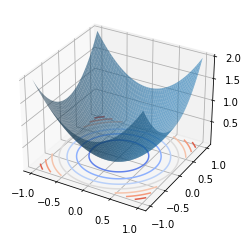

In [ ]:
fun = lambda x1, x2: x1**2 + x2**2
plot_3d(fun)

Окружности на плоскости Ox1x2 показывают проекции линий уровня поверхности.

### Задание.
1. Визуализировать плоскость $y = x_1 + 2 x_2 + 3$
2. Визуализировать плоскость, параллельную любой из осей координат
3. Визуализировать плоскость, проходящую через начало координат

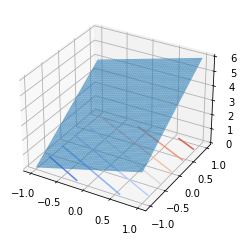

In [ ]:
# Ваш код
# Плоскость y = x1 + 2*x2 + 3

fun = lambda x1, x2: x1 + 2*x2 + 3
plot_3d(fun)

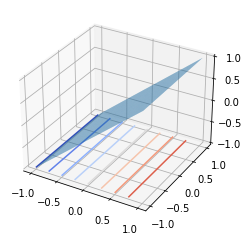

In [ ]:
# Ваш код
# Плоскость, параллельная оси координат

fun = lambda x1, x2: x1
plot_3d(fun)

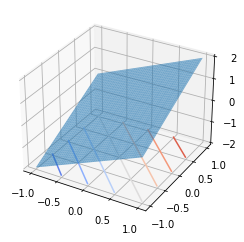

In [ ]:
# Ваш код
# Плоскость, проходящая через начало координат

fun = lambda x1, x2: x1 + x2
plot_3d(fun)

## Градиентный спуск

### Теоретическая часть

Градиент функции $f(x) = f(x_1, \dots, x_d)$ многих переменных в точке $x_0$ - это вектор ее частных производных, вычисленных в точке $x_0$.
$$\nabla_x f \bigl | _{x_0} = \biggl(\frac{\partial f}{\partial x_1}, \dots, \frac{\partial f}{\partial x_d} \biggr ) \biggl | _{x_0}$$

Разберем два простых примера вычисления градиента в случае функции от двух переменных.

#### Задача 1.

Найдите градиент линейной функции $f(x) = f(x_1, x_2) = c_1 x_1 + c_2 x_2$ ($c_1$ и $c_2$ - фиксированные числа). 

__Решение.__

Найдем первую частную производную: 

$$\frac{\partial f}{\partial x_1} = \frac{\partial (c_1 x_1 + c_2 x_2)}{\partial x_1} = c_1.$$

Значит, первая компонента градиента равна $c_1$. Аналогично со второй компонентой. Ответ:

$$\nabla_x f = (c_1, c_2)$$

Можно подставить конкретные коэффициенты, например $c_1 = 3$ и $c_2 = 7$. Тогда градиент будет равен $(3, 7)$. 

#### Задача 2.
Найдите градиент квадратичной функции $f(x) = f(x_1, x_2) = c_1 x_1^2 + c_2 x_2^2$ ($c_1$ и $c_2$ - фиксированные числа). 

__Решение.__
Найдем первую частную производную: 

$$\frac{\partial f}{\partial x_1} = \frac{\partial (c_1 x_1^2 + c_2 x_2^2)}{\partial x_1} = 2 c_1 x_1.$$

Значит, первая компонента градиента равна $2 c_1 x_1$. Аналогично со второй компонентой. Ответ:

$$\nabla_x f = (2 c_1 x_1, 2 c_2 x_2)$$

Если $c1=c2=c$, $\nabla_x f = 2cx$.

Ясно, что минимум такой квадратичной функции достигается в 0.
Следующая цель - найти этот минимум с помощью градиентного спуска. 

__Вспомнить из лекции:__
* Какую (оптимизационную) задачу решает градиентный спуск?
* Как работает алгоритм градиентного спуска?
* Как выбирать начальную инициализацию в градиентном спуске?
* Когда останавливать градиентный спуск?

### Практическая часть

Воспользуемся кодом задания квадратичной функции (выше) и обобщим ее на случай произвольных коэффициентов:

In [ ]:
def fun(x1, x2, c1=1, c2=1):
    return c1*x1**2 + c2*x2**2

Эта функция способна обрабатывать x1 и x2 любой размерности, но градиенты будем считать в предположении, что x1 и x2 - скаляры

### Задание

1. Реализовать вычисление градиента функции **fun** в заданной точке. 
2. Протестировать функцию **grad_fun**

In [ ]:
def grad_fun(x1, x2, c1=1, c2=1):
    """
    Функция принимает 2 числа - координаты точки, в которой нужно вычислить градиент,
    и возвращает np.array размерности (2,) - градиент квадратичной функции
    Опциональные аргументы: c1 и c2 - коэффициенты
    """
    
    """
    Z = c1 * x1**2 + c2 * x2**2
    Z'(x1) = 2 * c1 * x1
    Z'(x2) = 2 * c2 * x2
    """
    
    ### Ваш код
    
    return np.array([2 * c1 * x1, 2 * c2 * x2])

In [ ]:
# Тестирование
grad_fun(x1=0.5, x2=1.5, c1=2, c2=3)

array([2., 9.])

### Реализация градиентного спуска. 
Алгоритм: 
1. Инициализация начальной точки x (в коде ниже реализован случайный выбор точки)
1. Итеративно:
$$x = x - \alpha \nabla_x f$$
Здесь $\alpha$ - длина шага.


### Задание.
Дописать код метода, реализующего градиентный спуск для квадратичной функции

In [ ]:
def grad_descend(grad_fun, step_size=0.1, num_steps=20):
    """
    Реализует градиентный спуск
    Аргументы:
    * grad_fun - функция, вычисляющая градиент
    * step_size - длина шага
    * num_steps - число итераций
    
    Возвращает np.array размера (num_steps+1) x 2, 
    (i+1)-й элемент - точка на (i+1)-й итеарации,
    нулевой элемент - случайная инициализация
    """

    """
    x(i + 1) = x(i) - a * x(i)(grad)
    a = step_size
    x(grad) = grad_fun(...)
    """
    x = np.random.rand(2) * 4 - 2
    
    ### Ваш код
    
    x1, x2 = x[0], x[1]
    points = np.array([[x1, x2]])
    for i in range(0, num_steps):
        grad = grad_fun(x1=x1, x2=x2)
        x1 = x1 - step_size * grad[0]
        x2 = x2 - step_size * grad[1]
        points = np.append(points, np.array([[x1, x2]]), axis=0)

    return points

Протестируем функцию (последний элемент должен быть близок к 0):

In [ ]:
trace = grad_descend(grad_fun)
trace

array([[1.45197294, 1.93360271],
       [1.16157835, 1.54688217],
       [0.92926268, 1.23750573],
       [0.74341015, 0.99000459],
       [0.59472812, 0.79200367],
       [0.47578249, 0.63360294],
       [0.380626  , 0.50688235],
       [0.3045008 , 0.40550588],
       [0.24360064, 0.3244047 ],
       [0.19488051, 0.25952376],
       [0.15590441, 0.20761901],
       [0.12472353, 0.16609521],
       [0.09977882, 0.13287617],
       [0.07982306, 0.10630093],
       [0.06385845, 0.08504075],
       [0.05108676, 0.0680326 ],
       [0.04086941, 0.05442608],
       [0.03269552, 0.04354086],
       [0.02615642, 0.03483269],
       [0.02092514, 0.02786615],
       [0.01674011, 0.02229292]])

Теперь можно визуализировать процесс градиентного спуска. Для этого нужно передать построенную траекторию оптимизации в качестве последнего аргумента функции **plot_3d**.

### Задание

Реализовать визуализацию градиентного спуска.

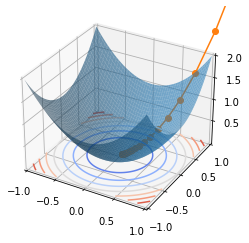

In [ ]:
### Ваш код

plot_3d(fun, trace=trace)

Может потребоваться запустить ячейку несколько раз, чтобы траекторию было лучше видно.

### Задание

Реализовать цикл, запускающий процесс оптимизации (с визуализацией) несколько раз, чтобы проследить зависимость процесса от начального приближения.

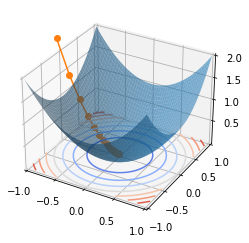

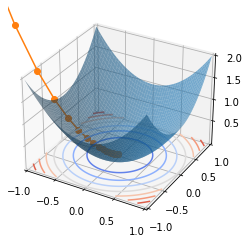

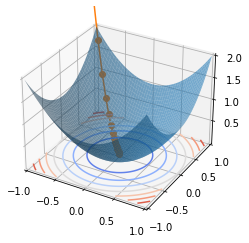

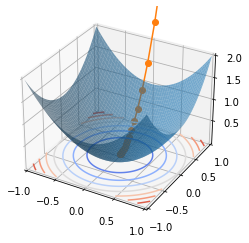

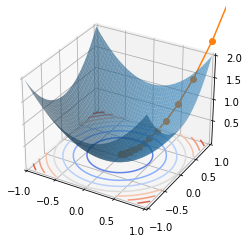

In [ ]:
### Ваш код

for _ in range(0, 5):
    trace = grad_descend(grad_fun=grad_fun)
    plot_3d(fun=fun, trace=trace)

### Задание

Поэкспериментировать с длиной шага, задав значения из множества 0.01, 0.1, 0.5, 1.

Рекомендуется перед запуском градиентного спуска написать np.random.seed(<число>), чтобы все запуски были из одного начального приближения.

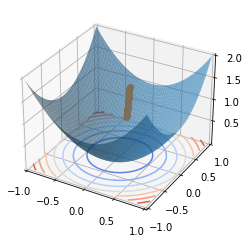

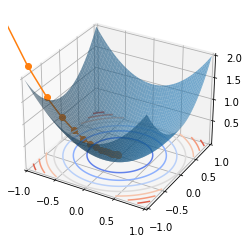

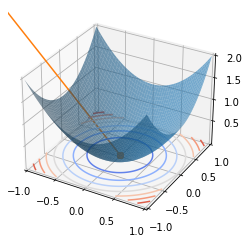

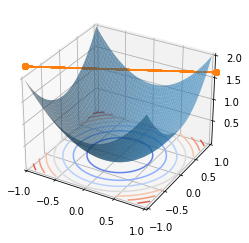

In [ ]:
### Ваш код

'''
    Метод random.seed() задает начальные условия для генератора случайных чисел.
    Генератор инициализированный одними и теми же начальными условиями, выдает 
    абсолютно идентичные случайные последовательности.
'''

np.random.seed(1)
for i in [0.01, 0.1, 0.5, 1]:
    trace = grad_descend(grad_fun=grad_fun, step_size=i)
    plot_3d(fun=fun, trace=trace)

In [ ]:
print(trace)

[[-1.25495915 -0.61775709]
 [ 1.25495915  0.61775709]
 [-1.25495915 -0.61775709]
 [ 1.25495915  0.61775709]
 [-1.25495915 -0.61775709]
 [ 1.25495915  0.61775709]
 [-1.25495915 -0.61775709]
 [ 1.25495915  0.61775709]
 [-1.25495915 -0.61775709]
 [ 1.25495915  0.61775709]
 [-1.25495915 -0.61775709]
 [ 1.25495915  0.61775709]
 [-1.25495915 -0.61775709]
 [ 1.25495915  0.61775709]
 [-1.25495915 -0.61775709]
 [ 1.25495915  0.61775709]
 [-1.25495915 -0.61775709]
 [ 1.25495915  0.61775709]
 [-1.25495915 -0.61775709]
 [ 1.25495915  0.61775709]
 [-1.25495915 -0.61775709]]


При маленькой длине шага процесс идет сишком медленно, при большой - может разойтись.

### Задание
Оптимизировать функцию $f(x) = x_1^2 + 5 x_2^2$, пробуя длину шага, равную 0.1, 0.2, 0.5

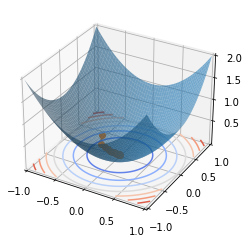

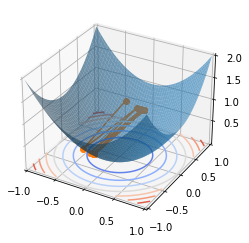

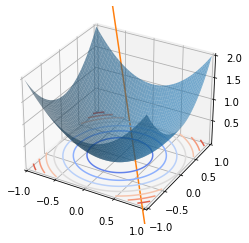

In [ ]:
### Ваш код

# np.random.seed(4)
grad_lambda = lambda x1, x2: np.array([2 * x1, 10 * x2])
for i in [0.1, 0.2, 0.5]:
    trace = grad_descend(grad_fun=grad_lambda, step_size=i)
    plot_3d(fun=fun, trace=trace)

In [ ]:
print(trace)

[[-1.18219100e+00  1.51246975e+00]
 [ 0.00000000e+00 -6.04987898e+00]
 [ 0.00000000e+00  2.41995159e+01]
 [ 0.00000000e+00 -9.67980637e+01]
 [ 0.00000000e+00  3.87192255e+02]
 [ 0.00000000e+00 -1.54876902e+03]
 [ 0.00000000e+00  6.19507608e+03]
 [ 0.00000000e+00 -2.47803043e+04]
 [ 0.00000000e+00  9.91212172e+04]
 [ 0.00000000e+00 -3.96484869e+05]
 [ 0.00000000e+00  1.58593948e+06]
 [ 0.00000000e+00 -6.34375790e+06]
 [ 0.00000000e+00  2.53750316e+07]
 [ 0.00000000e+00 -1.01500126e+08]
 [ 0.00000000e+00  4.06000506e+08]
 [ 0.00000000e+00 -1.62400202e+09]
 [ 0.00000000e+00  6.49600809e+09]
 [ 0.00000000e+00 -2.59840324e+10]
 [ 0.00000000e+00  1.03936129e+11]
 [ 0.00000000e+00 -4.15744518e+11]
 [ 0.00000000e+00  1.66297807e+12]]


Функцию с различающимися по величине коэффициентами сложнее оптимизировать. Именно поэтому рекомендуется нормировать данные перед обучением модели, чтобы избежать таких колебаний при оптимизации.